In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree
import sklearn
import os

In [2]:
df_train = pd.read_csv("../train.csv")
df_test = pd.read_csv("../test.csv")

In [3]:
df_train = df_train.drop(["Name", "Ticket", "Cabin"], axis="columns")
df_test = df_test.drop(["Name", "Ticket", "Cabin"], axis="columns")

In [4]:
df_train = df_train.dropna()

In [6]:
df_train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
886    S
887    S
889    C
890    Q
Name: Embarked, Length: 712, dtype: object

In [5]:
pd.factorize(df_train['Embarked'])[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [7]:
df_train['Embarked'] = pd.factorize(df_train['Embarked'])[0]
df_test['Embarked'] = pd.factorize(df_test['Embarked'])[0]

In [8]:
df_train['Sex'] = [0 if i == "male" else 1 for i in df_train['Sex']]
df_test['Sex'] = [0 if i == "male" else 1 for i in df_test['Sex']]

In [9]:
model = tree.DecisionTreeClassifier()

In [10]:
df = df_train.drop("Survived", axis=1)
sur = df_train['Survived']

In [11]:
model.fit(df, sur)

DecisionTreeClassifier()

[Text(163.2671081542969, 211.4, 'X[2] <= 0.5\ngini = 0.482\nsamples = 712\nvalue = [424, 288]'),
 Text(52.27824204388787, 199.32, 'X[3] <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(4.923529411764706, 187.24, 'X[4] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(2.461764705882353, 175.16, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(7.385294117647059, 175.16, 'X[3] <= 2.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(4.923529411764706, 163.07999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(9.847058823529412, 163.07999999999998, 'X[3] <= 3.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(7.385294117647059, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.308823529411764, 151.0, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(99.63295467601104, 187.24, 'X[1] <= 1.5\ngini = 0.295\nsamples = 429\nvalue = [352, 77]'),
 Text(41.23455882352941, 175.16, 'X[0] <= 548.5\ngini = 0.473\nsamples = 99\nvalue = [61, 38]'),
 

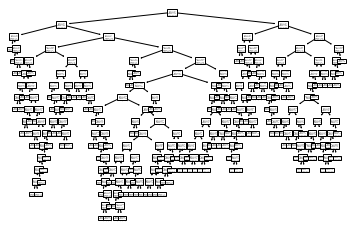

In [13]:
plot_tree(model)

In [13]:
df_test = df_test.fillna(df_test.mean())

In [14]:
pred = model.predict(df_test).tolist()

In [15]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,0
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,0
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [155]:
df = pd.DataFrame({"PassengerId":df_test["PassengerId"], "Survived":pred})

In [156]:
df.to_csv("sub.csv", index=False)

In [152]:
df.reset_index(drop=True, inplace=True)

In [153]:
df

,Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
